In [88]:
#第五类感染性病毒恶意软件EDA
#特点：Thread32Next枚举线程，枚举文件，占领本机，在数据中得到体现
import pandas as pd
data_df5=pd.read_csv('label5.csv')

In [89]:
data_df5.head()

,file_id,label,api,tid,return_value,index
0,1,5,__exception__,2524,0,0
1,1,5,NtTerminateProcess,2524,0,1
2,2,5,GetSystemTimeAsFileTime,2516,0,0
3,2,5,LdrGetDllHandle,2516,0,1
4,2,5,LdrGetProcedureAddress,2516,0,2


In [90]:
data_df5.groupby(['file_id','label'])['api'].nunique().sort_values(ascending=False)

file_id  label
54296    5        166
3980     5        156
26278    5        154
85565    5        153
45949    5        148
34618    5        147
106437   5        146
21470    5        144
72911    5        142
26923    5        142
50092    5        142
20017    5        140
46591    5        139
47951    5        139
61365    5        138
6228     5        136
45948    5        136
108458   5        136
34488    5        135
46508    5        134
16388    5        131
5152     5        131
11762    5        131
7727     5        130
32527    5        130
90282    5        130
53623    5        129
7467     5        128
16709    5        128
47701    5        127
                 ... 
84109    5          1
84032    5          1
27850    5          1
27851    5          1
83835    5          1
28082    5          1
8777     5          1
83688    5          1
83687    5          1
28677    5          1
82070    5          1
81902    5          1
28933    5          1
81305    5       

In [91]:
api=data_df5['api'].value_counts()

In [92]:
api

LdrGetProcedureAddress               4241451
Thread32Next                         3901598
GetCursorPos                         1853321
NtClose                              1671542
GetSystemMetrics                     1137018
NtDelayExecution                      855552
RegOpenKeyExW                         693086
RegQueryValueExW                      678120
NtQueryDirectoryFile                  618145
RegCloseKey                           550527
NtAllocateVirtualMemory               460406
GetKeyState                           431336
NtReadFile                            371943
FindFirstFileExW                      367568
NtProtectVirtualMemory                352566
LdrLoadDll                            332269
GetForegroundWindow                   329639
NtQueryValueKey                       318519
NtWriteFile                           278002
LoadResource                          244284
LoadStringA                           240646
RegQueryValueExA                      211632
FindResour

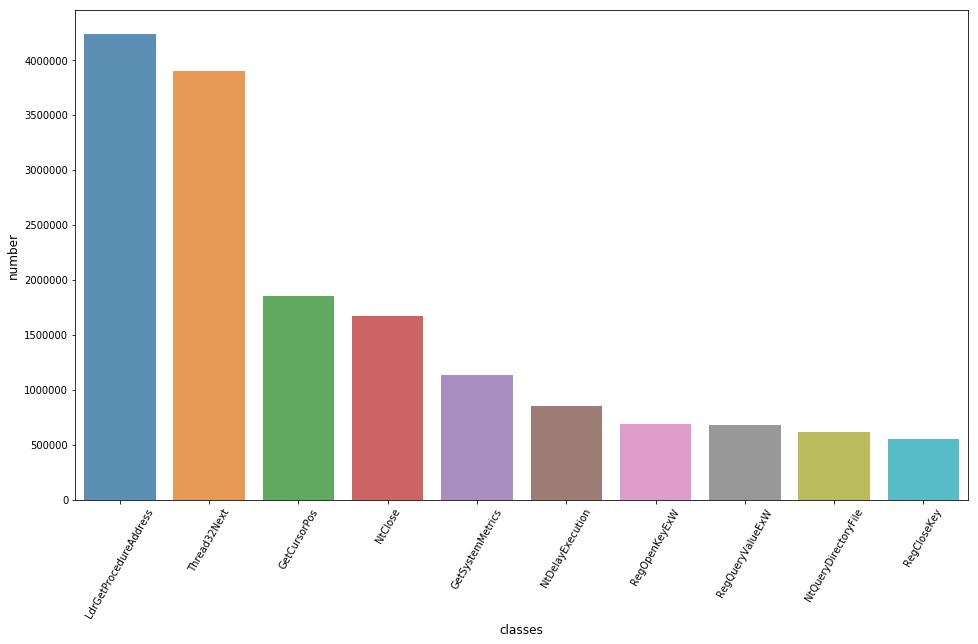

In [93]:
#所有文件中top api调用数量
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.barplot(api.index[0:10],api.values[0:10],alpha=0.8)
plt.xticks(rotation=60)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

In [94]:
every_file5=data_df5.groupby('file_id')['api'].count().sort_values(ascending=False)

In [95]:
every_file5

file_id
39117     443957
52774     257231
43465     222417
34618     215564
81650     176488
14031     145077
43464     142592
8917       71896
50092      67586
53623      61085
3980       58449
25922      54371
5152       53751
90282      52790
95646      52510
84035      50745
84274      49975
21470      49438
55250      48683
8778       48626
16709      48206
31388      47599
46816      47503
71117      47481
106437     47462
109234     46713
70206      43916
82991      43727
8101       42847
21070      42705
           ...  
70015          2
68703          2
60740          2
55023          2
102800         2
55504          2
55669          2
11638          2
56203          2
11137          2
57879          2
112837         2
8184           2
101671         2
61176          2
114965         2
63863          2
65200          2
8235           2
66948          2
67431          2
1              2
109290         1
73785          1
10485          1
71601          1
88689          1
115330

In [96]:
import numpy
index=[]
for i in range(len(every_file5)):
    index.append(i)
index=numpy.array(index)

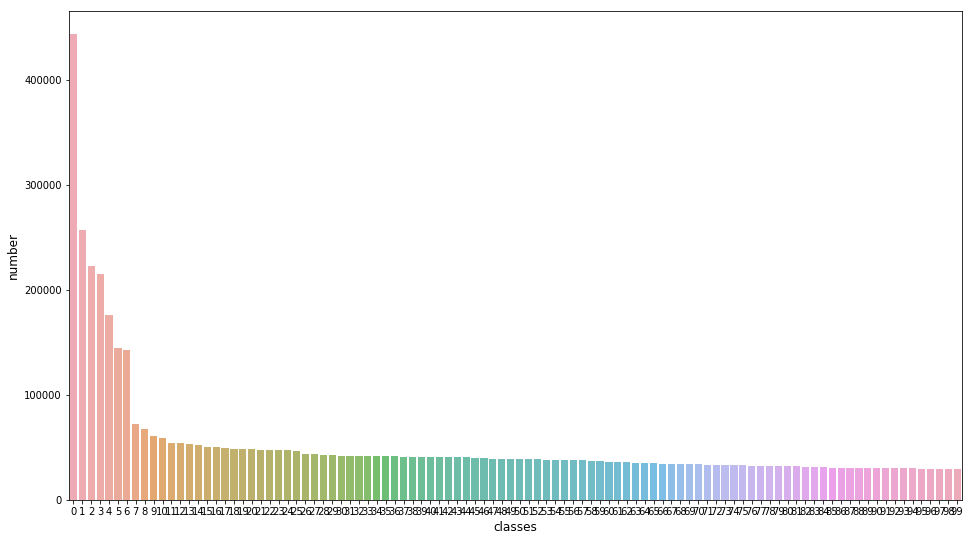

In [97]:
#每个文件调用api数量分布图，每个文件之间对比
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

plt.figure(figsize=(16,9))
sns.barplot(index[0:100],every_file5.values[0:100],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

/home/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


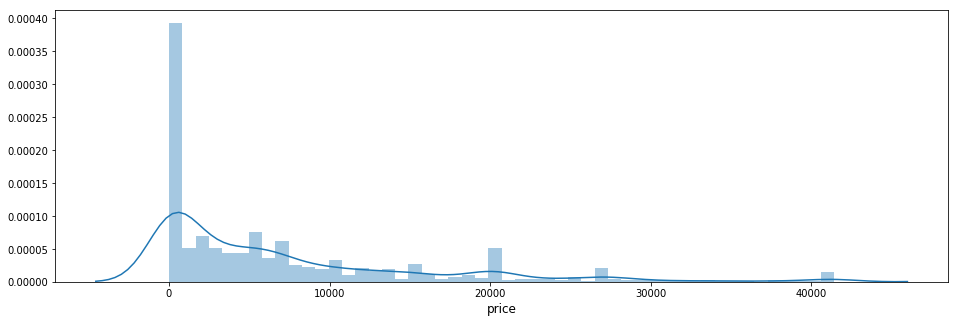

In [98]:

#文件调用api数量分布直方图
ulimit_start = numpy.percentile(every_file5.values,1)
ulimit_end = numpy.percentile(every_file5.values,99)
every_file5.loc[[every_file5.iloc[i]<ulimit_start for i in range(len(every_file5))]]=ulimit_start
every_file5.loc[[every_file5.iloc[i]>ulimit_end for i in range(len(every_file5))]]=ulimit_end
plt.figure(figsize=(16,5))
sns.distplot(every_file5.values,bins=50,kde=True)
plt.xlabel('price',fontsize=12)
plt.show()

In [99]:
every_file5

file_id
39117     41418.72
52774     41418.72
43465     41418.72
34618     41418.72
81650     41418.72
14031     41418.72
43464     41418.72
8917      41418.72
50092     41418.72
53623     41418.72
3980      41418.72
25922     41418.72
5152      41418.72
90282     41418.72
95646     41418.72
84035     41418.72
84274     41418.72
21470     41418.72
55250     41418.72
8778      41418.72
16709     41418.72
31388     41418.72
46816     41418.72
71117     41418.72
106437    41418.72
109234    41418.72
70206     41418.72
82991     41418.72
8101      41418.72
21070     41418.72
            ...   
70015         2.00
68703         2.00
60740         2.00
55023         2.00
102800        2.00
55504         2.00
55669         2.00
11638         2.00
56203         2.00
11137         2.00
57879         2.00
112837        2.00
8184          2.00
101671        2.00
61176         2.00
114965        2.00
63863         2.00
65200         2.00
8235          2.00
66948         2.00
67431         2.00
1   

In [100]:
file_2=data_df5[data_df5['file_id']==3]
#print(file_2)
tid=file_2.groupby('tid')['index','api']

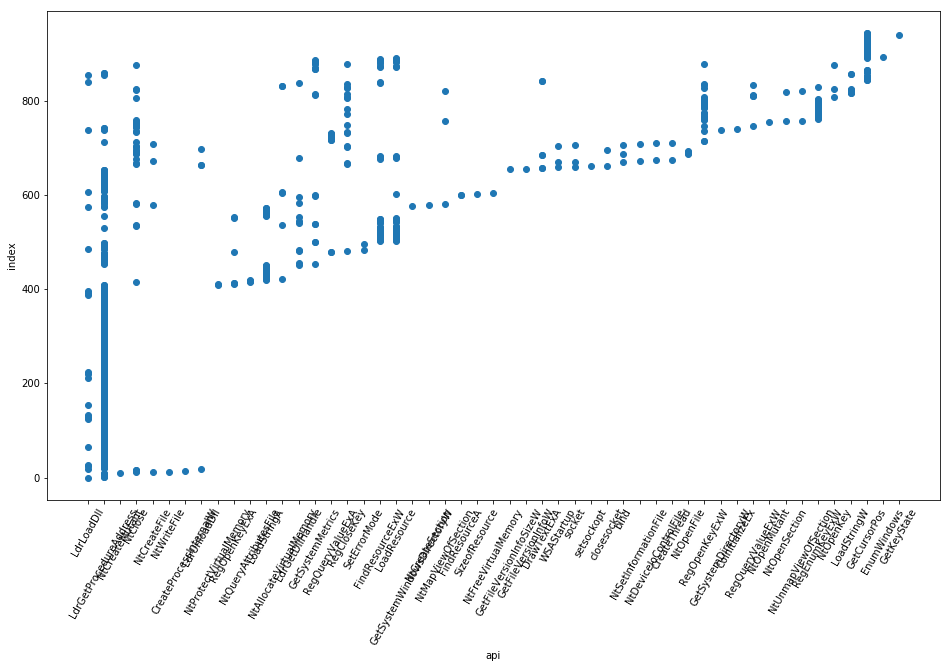

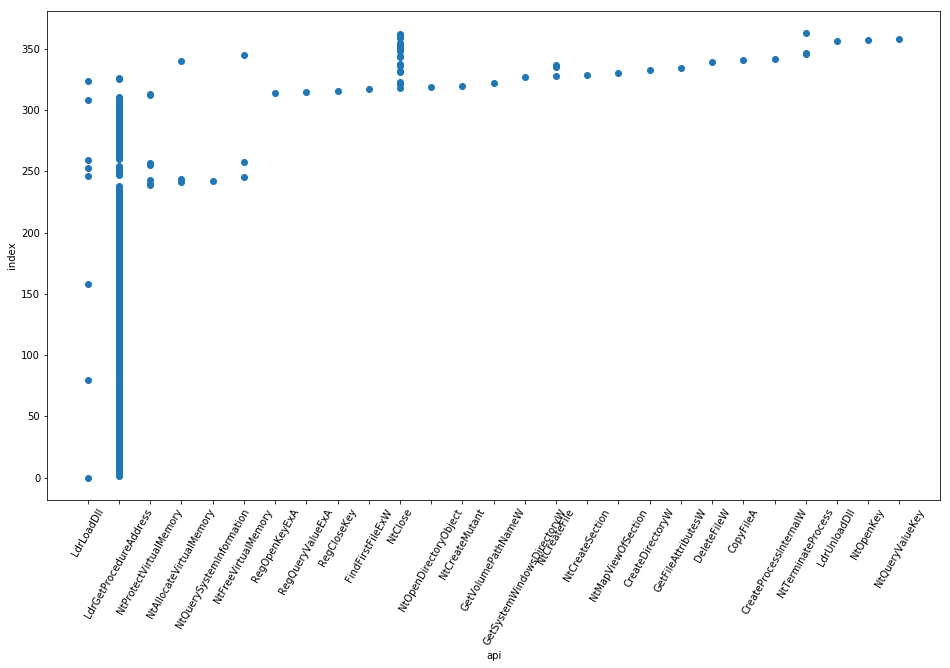

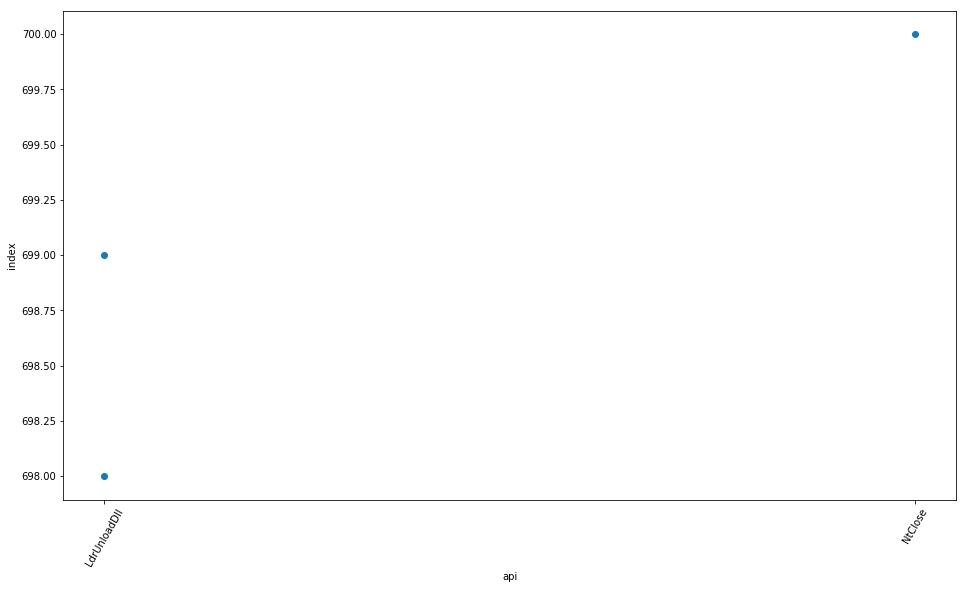

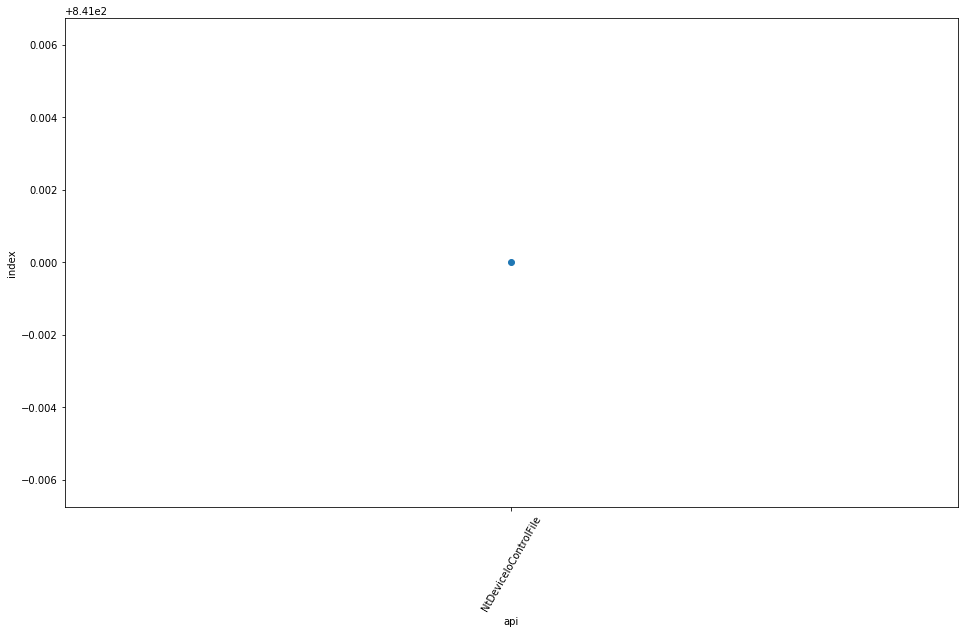

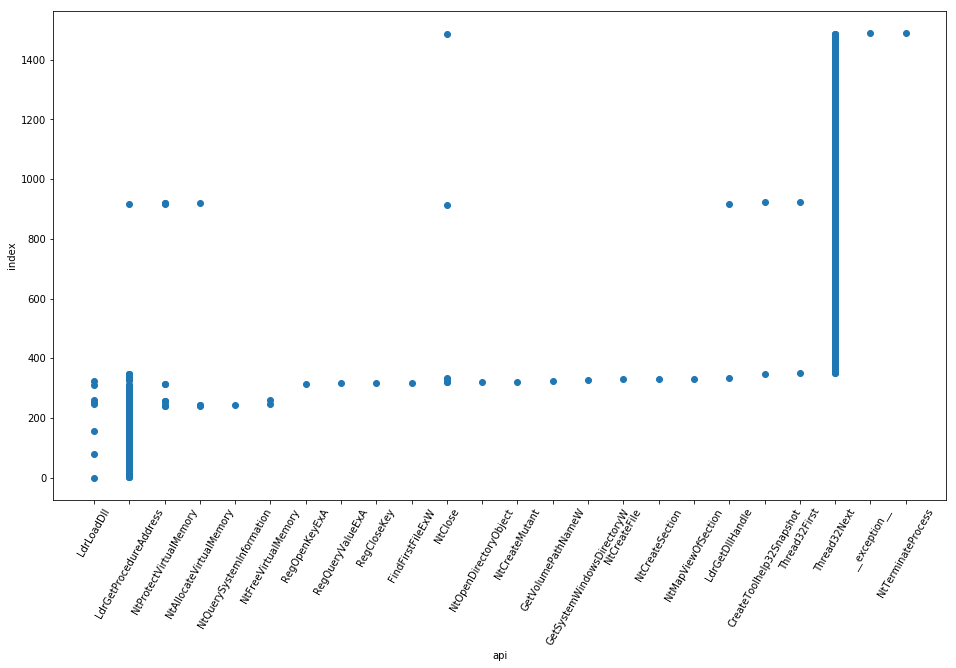

In [101]:
for i,j in tid:
    plt.figure(figsize=(16,9))
    plt.scatter((j['api'].values),j['index'])
    plt.xticks(rotation=60)
    plt.yticks(rotation=360)
    plt.xlabel('api',fontsize=10)
    plt.ylabel('index',fontsize=10)
    plt.show()

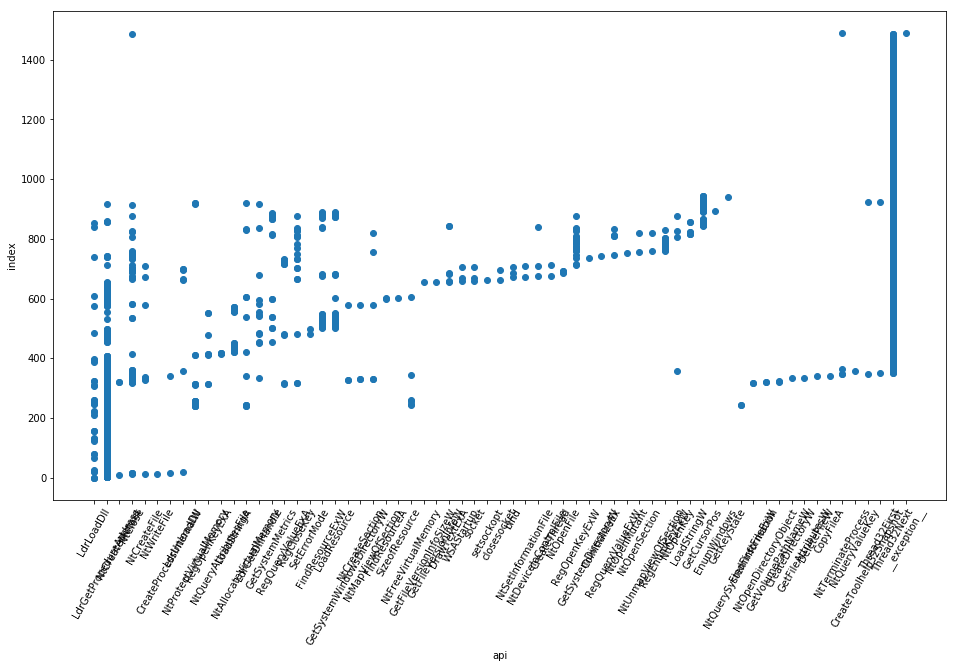

In [104]:
#第3个
file_4=data_df5[data_df5['file_id']==3]
plt.figure(figsize=(16,9))
plt.scatter((file_4['api'].values),file_4['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

In [ ]:
#第一个文件散点图
file_1=data_df5[data_df5['file_id']==23293]

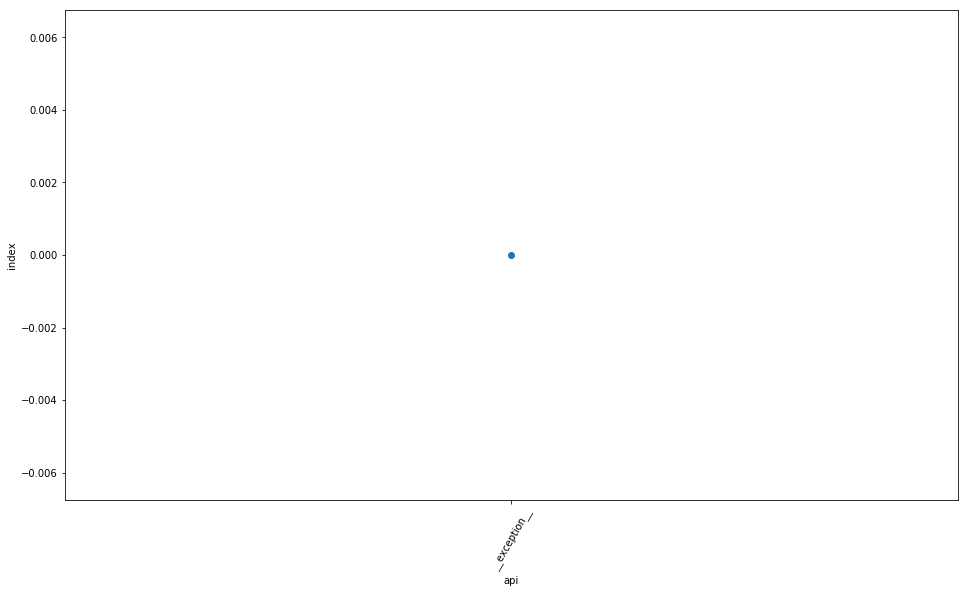

In [105]:
plt.figure(figsize=(16,9))
plt.scatter((file_1['api'].values),(file_1['index']))
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

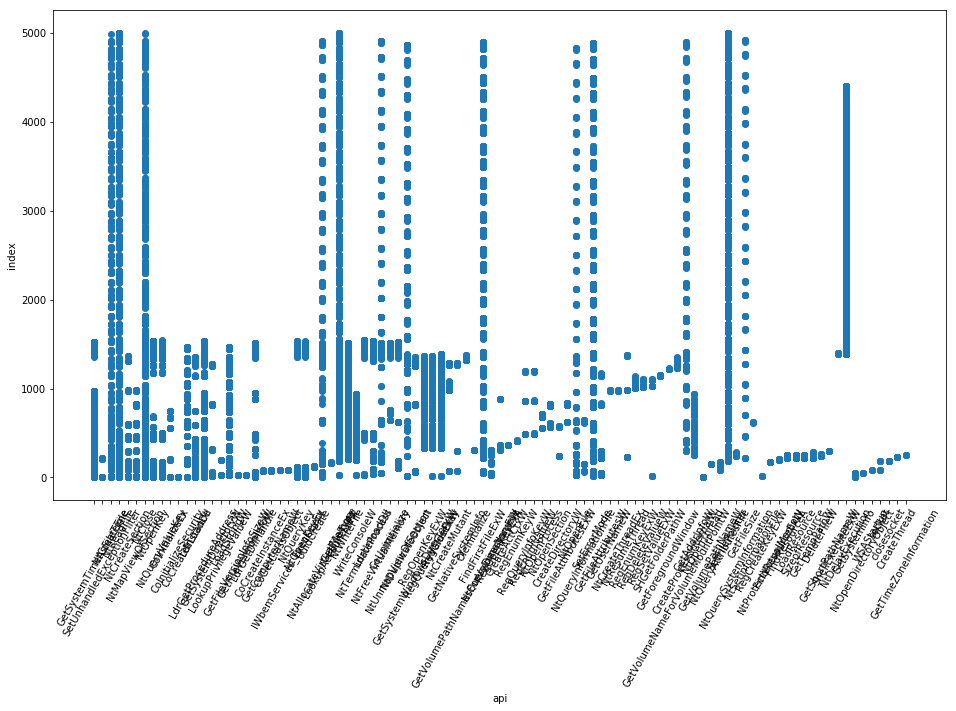

In [106]:
#第%99个文件散点图
file_4=data_df5[data_df5['file_id']==39117]
plt.figure(figsize=(16,9))
plt.scatter((file_4['api'].values),(file_4['index']))
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

2800


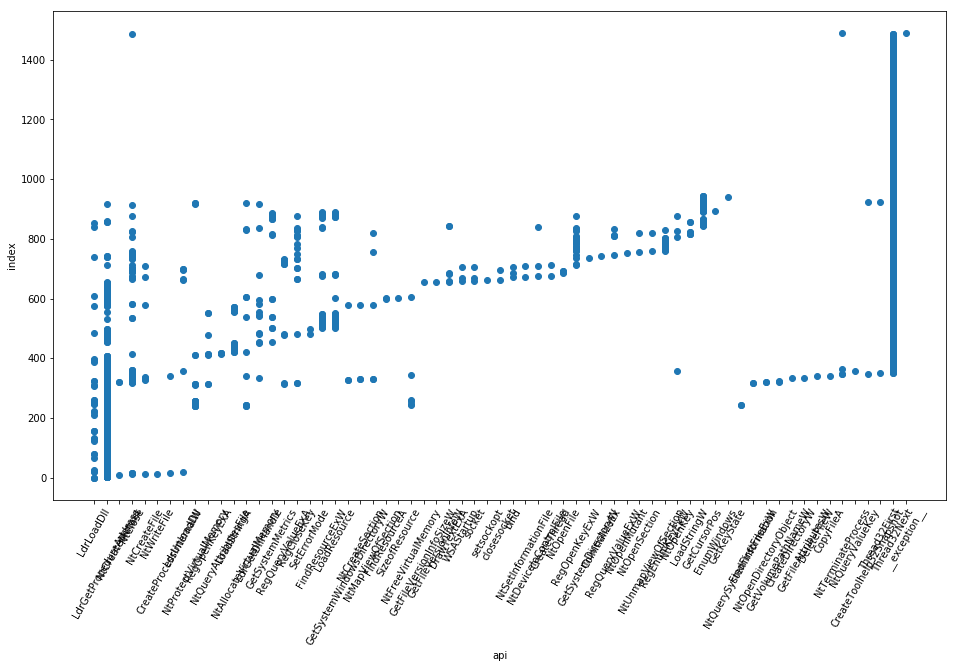

In [107]:
#第%99个文件散点图
file_4=data_df5[data_df5['file_id']==3]
print(len(file_4))
plt.figure(figsize=(16,9))
plt.scatter((file_4['api'].values),(file_4['index']))
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

In [108]:
every_file5[0:600]

file_id
39117     41418.72
52774     41418.72
43465     41418.72
34618     41418.72
81650     41418.72
14031     41418.72
43464     41418.72
8917      41418.72
50092     41418.72
53623     41418.72
3980      41418.72
25922     41418.72
5152      41418.72
90282     41418.72
95646     41418.72
84035     41418.72
84274     41418.72
21470     41418.72
55250     41418.72
8778      41418.72
16709     41418.72
31388     41418.72
46816     41418.72
71117     41418.72
106437    41418.72
109234    41418.72
70206     41418.72
82991     41418.72
8101      41418.72
21070     41418.72
            ...   
45157     15003.00
104067    15003.00
46413     15003.00
65053     15003.00
57193     15003.00
35896     15003.00
106627    15003.00
71546     15003.00
34524     15003.00
41830     15003.00
77757     15003.00
42176     15003.00
63845     15003.00
3488      15003.00
56723     15003.00
56304     15003.00
40982     15003.00
10756     15003.00
63813     15003.00
39699     15003.00
102995    14993.00
3730

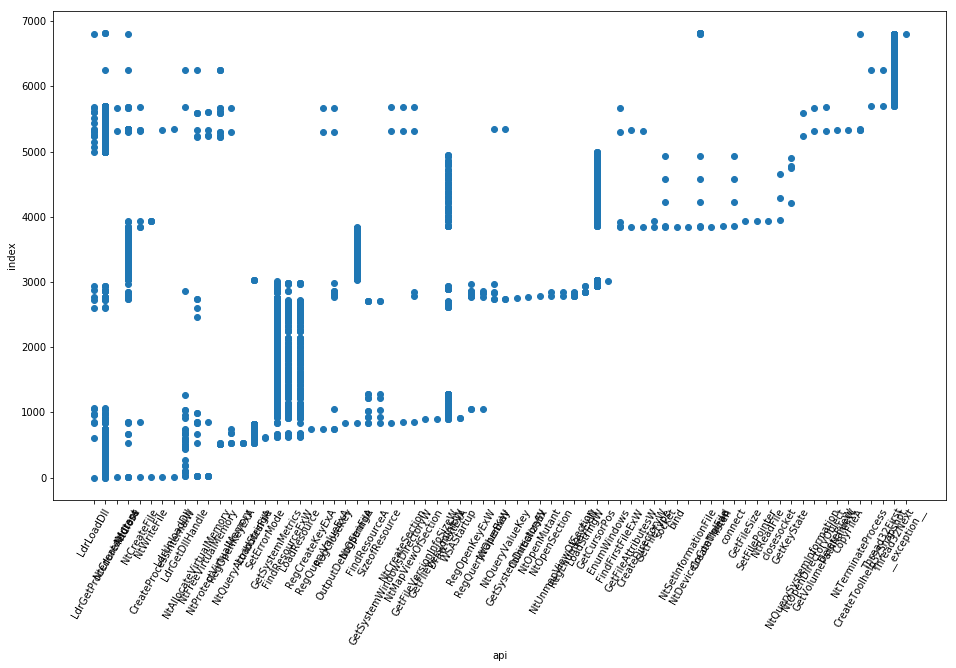

In [109]:
#第%50个文件散点图
file_2=data_df5[data_df5['file_id']==75214]
plt.figure(figsize=(16,9))
plt.scatter((file_2['api'].values),range(file_2.shape[0]))
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

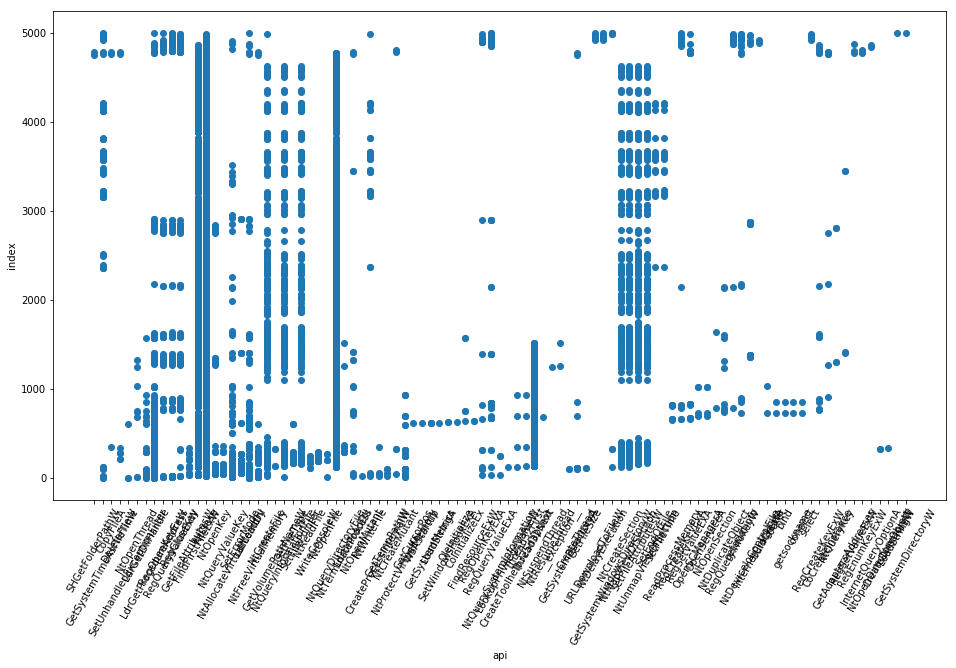

In [110]:
#第25%个文件散点图
file_3=data_df5[data_df5['file_id']==39235 ]
#print(file_3['index'])
plt.figure(figsize=(16,9))
plt.scatter((file_3['api'].values),file_3['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

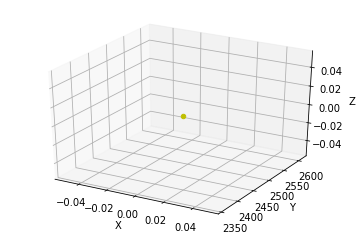

In [111]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df5[data_df5['file_id']==23293][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


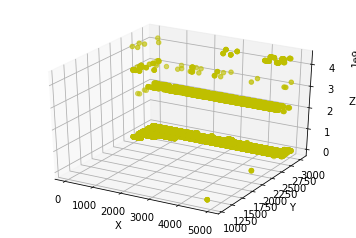

In [112]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df5[data_df5['file_id']==39235][['index','tid','return_value']])

x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


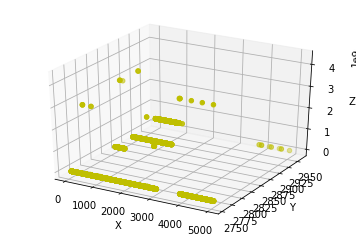

In [113]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df5[data_df5['file_id']==75214][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


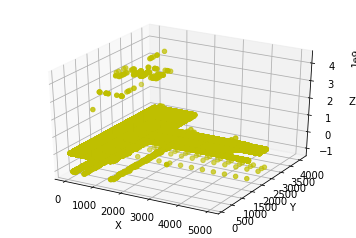

In [114]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df5[data_df5['file_id']==39117][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()
